In [1]:
# Declaration Page - Include all library declarations in this section
# For matrix computation# For m 
import numpy as np
# For data manipulation 
import pandas as pd
# For 2D plotting 
from matplotlib import pyplot as plt
# For modelling using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
# for corelation chart
import seaborn as sns

In [2]:
vehicle_df = pd.read_csv('vehicle (2).csv')
vehicle_df.columns = vehicle_df.columns.str.replace('.','_')

In [3]:
## Check if there are datasets with missing values
vehicle_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr_axis_aspect_ratio           2
max_length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr_axis_rectangularity         3
max_length_rectangularity      0
scaled_variance                3
scaled_variance_1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration_1    4
skewness_about                 6
skewness_about_1               1
skewness_about_2               1
hollows_ratio                  0
class                          0
dtype: int64

In [4]:
### As observed above there are multiple columns with NAN values
### Imputation by replacing these with means overall will not make sense as there are three vehicle categories
### Each variable will have to be imputed with the mean of the individual class applicable to the row

In [5]:
vehicle_df['circularity'] = vehicle_df.circularity.fillna(vehicle_df.groupby('class')['circularity'].transform('mean'))
vehicle_df['distance_circularity'] = vehicle_df.distance_circularity.fillna(vehicle_df.groupby('class')['distance_circularity'].transform('mean'))
vehicle_df['radius_ratio'] = vehicle_df.radius_ratio.fillna(vehicle_df.groupby('class')['radius_ratio'].transform('mean'))
vehicle_df['pr_axis_aspect_ratio'] = vehicle_df.pr_axis_aspect_ratio.fillna(vehicle_df.groupby('class')['pr_axis_aspect_ratio'].transform('mean'))
vehicle_df['scatter_ratio'] = vehicle_df.scatter_ratio.fillna(vehicle_df.groupby('class')['scatter_ratio'].transform('mean'))
vehicle_df['elongatedness'] = vehicle_df.elongatedness.fillna(vehicle_df.groupby('class')['elongatedness'].transform('mean'))
vehicle_df['pr_axis_rectangularity'] = vehicle_df.pr_axis_rectangularity.fillna(vehicle_df.groupby('class')['pr_axis_rectangularity'].transform('mean'))
vehicle_df['scaled_variance'] = vehicle_df.scaled_variance.fillna(vehicle_df.groupby('class')['scaled_variance'].transform('mean'))
vehicle_df['scaled_variance_1'] = vehicle_df.scaled_variance_1.fillna(vehicle_df.groupby('class')['scaled_variance_1'].transform('mean'))
vehicle_df['scaled_radius_of_gyration'] = vehicle_df.scaled_radius_of_gyration.fillna(vehicle_df.groupby('class')['scaled_radius_of_gyration'].transform('mean'))
vehicle_df['scaled_radius_of_gyration_1'] = vehicle_df.scaled_radius_of_gyration_1.fillna(vehicle_df.groupby('class')['scaled_radius_of_gyration_1'].transform('mean'))
vehicle_df['skewness_about'] = vehicle_df.skewness_about.fillna(vehicle_df.groupby('class')['skewness_about'].transform('mean'))
vehicle_df['skewness_about_1'] = vehicle_df.skewness_about_1.fillna(vehicle_df.groupby('class')['skewness_about_1'].transform('mean'))
vehicle_df['skewness_about_2'] = vehicle_df.skewness_about_2.fillna(vehicle_df.groupby('class')['skewness_about_2'].transform('mean'))

In [6]:
## Check if na values are left
vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr_axis_aspect_ratio           0
max_length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr_axis_rectangularity         0
max_length_rectangularity      0
scaled_variance                0
scaled_variance_1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration_1    0
skewness_about                 0
skewness_about_1               0
skewness_about_2               0
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
# Check individual columns for outliers

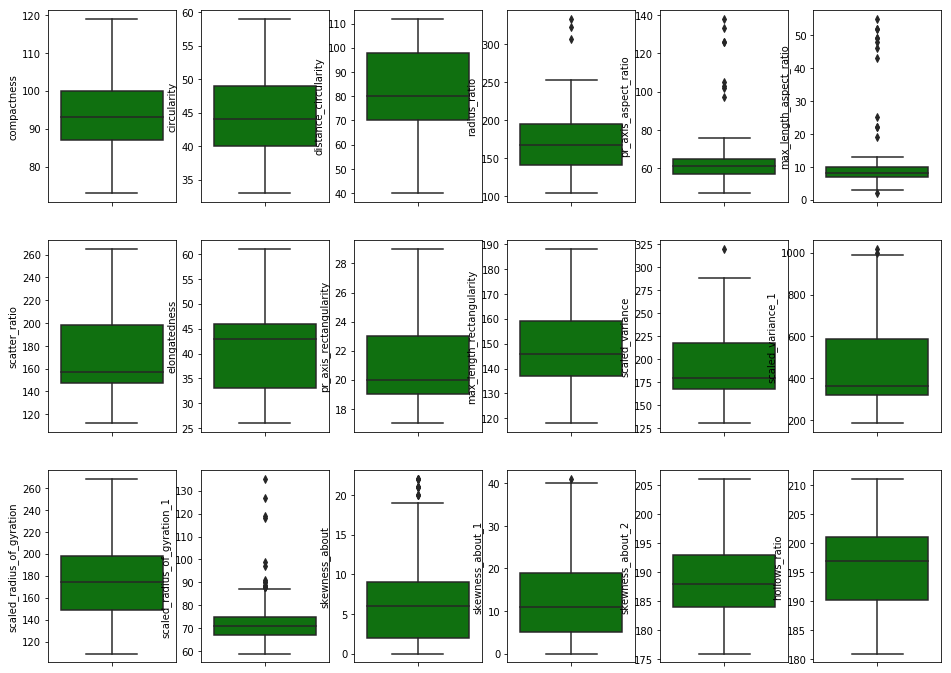

In [8]:
PD_Mtrx, axs = plt.subplots(ncols = 6,nrows = 3, figsize=(16, 12))
sns.boxplot(vehicle_df.compactness, color = "green", orient = "v",ax=axs[0,0])
sns.boxplot(vehicle_df.circularity, color = "green", orient = "v",ax=axs[0,1])
sns.boxplot(vehicle_df.distance_circularity, color = "green", orient = "v",ax=axs[0,2])
sns.boxplot(vehicle_df.radius_ratio, color = "green", orient = "v",ax=axs[0,3])
sns.boxplot(vehicle_df.pr_axis_aspect_ratio, color = "green", orient = "v",ax=axs[0,4])
sns.boxplot(vehicle_df.max_length_aspect_ratio, color = "green", orient = "v",ax=axs[0,5])

sns.boxplot(vehicle_df.scatter_ratio, color = "green", orient = "v",ax=axs[1,0])
sns.boxplot(vehicle_df.elongatedness, color = "green", orient = "v",ax=axs[1,1])
sns.boxplot(vehicle_df.pr_axis_rectangularity, color = "green", orient = "v",ax=axs[1,2])
sns.boxplot(vehicle_df.max_length_rectangularity, color = "green", orient = "v",ax=axs[1,3])
sns.boxplot(vehicle_df.scaled_variance, color = "green", orient = "v",ax=axs[1,4])
sns.boxplot(vehicle_df.scaled_variance_1, color = "green", orient = "v",ax=axs[1,5])

sns.boxplot(vehicle_df.scaled_radius_of_gyration, color = "green", orient = "v",ax=axs[2,0])
sns.boxplot(vehicle_df.scaled_radius_of_gyration_1, color = "green", orient = "v",ax=axs[2,1])
sns.boxplot(vehicle_df.skewness_about, color = "green", orient = "v",ax=axs[2,2])
sns.boxplot(vehicle_df.skewness_about_1, color = "green", orient = "v",ax=axs[2,3])
sns.boxplot(vehicle_df.skewness_about_2, color = "green", orient = "v",ax=axs[2,4])
sns.boxplot(vehicle_df.hollows_ratio, color = "green", orient = "v",ax=axs[2,5])

In [9]:
### The box plots show that 'radius_ratio, 'pr_axis_aspect_ratio, 'max_length_aspect_ratio'
### 'scaled_radius_of_gyration_1' has lot of variance outside the standard spread
### We will treat this specifically in the dataset

In [10]:
from scipy import stats
vehicle_df['radius_ratio_z'] = np.abs(stats.zscore(vehicle_df['radius_ratio']))
vehicle_df['pr_axis_aspect_ratio_z'] = np.abs(stats.zscore(vehicle_df['pr_axis_aspect_ratio']))
vehicle_df['max_length_aspect_ratio_z'] = np.abs(stats.zscore(vehicle_df['max_length_aspect_ratio']))
vehicle_df['scaled_radius_of_gyration_1_z'] = np.abs(stats.zscore(vehicle_df['scaled_radius_of_gyration_1']))

In [11]:
vehicle_df_o = vehicle_df[(vehicle_df['radius_ratio_z'] < 3) & (vehicle_df['pr_axis_aspect_ratio_z'] < 3) & (vehicle_df['max_length_aspect_ratio_z'] < 3) & (vehicle_df['scaled_radius_of_gyration_1_z'] < 3)]

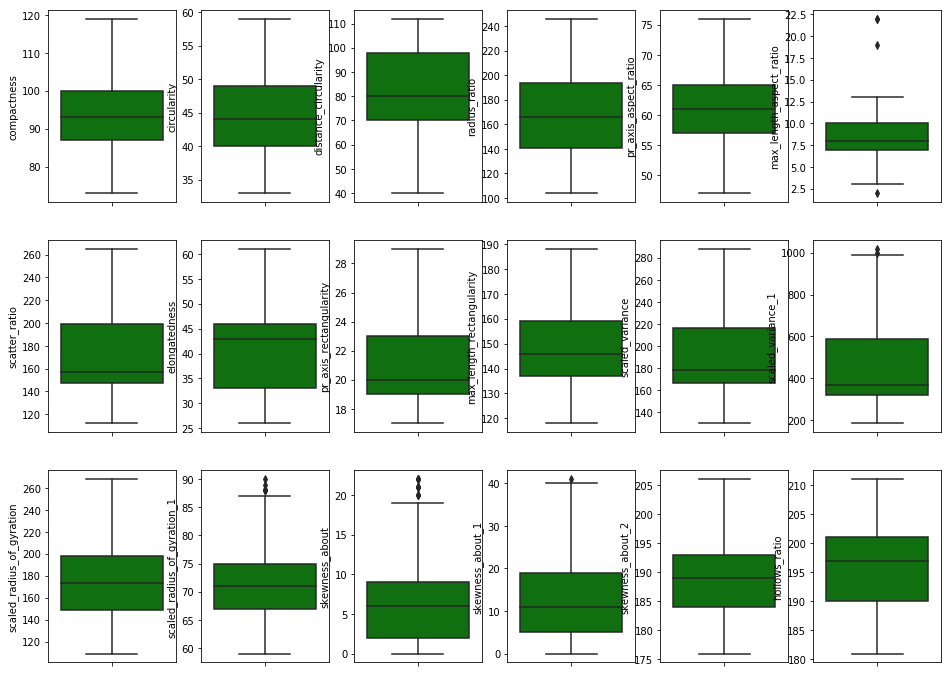

In [12]:
PD_Mtrx, axs = plt.subplots(ncols = 6,nrows = 3, figsize=(16, 12))
sns.boxplot(vehicle_df_o.compactness, color = "green", orient = "v",ax=axs[0,0])
sns.boxplot(vehicle_df_o.circularity, color = "green", orient = "v",ax=axs[0,1])
sns.boxplot(vehicle_df_o.distance_circularity, color = "green", orient = "v",ax=axs[0,2])
sns.boxplot(vehicle_df_o.radius_ratio, color = "green", orient = "v",ax=axs[0,3])
sns.boxplot(vehicle_df_o.pr_axis_aspect_ratio, color = "green", orient = "v",ax=axs[0,4])
sns.boxplot(vehicle_df_o.max_length_aspect_ratio, color = "green", orient = "v",ax=axs[0,5])

sns.boxplot(vehicle_df_o.scatter_ratio, color = "green", orient = "v",ax=axs[1,0])
sns.boxplot(vehicle_df_o.elongatedness, color = "green", orient = "v",ax=axs[1,1])
sns.boxplot(vehicle_df_o.pr_axis_rectangularity, color = "green", orient = "v",ax=axs[1,2])
sns.boxplot(vehicle_df_o.max_length_rectangularity, color = "green", orient = "v",ax=axs[1,3])
sns.boxplot(vehicle_df_o.scaled_variance, color = "green", orient = "v",ax=axs[1,4])
sns.boxplot(vehicle_df_o.scaled_variance_1, color = "green", orient = "v",ax=axs[1,5])

sns.boxplot(vehicle_df_o.scaled_radius_of_gyration, color = "green", orient = "v",ax=axs[2,0])
sns.boxplot(vehicle_df_o.scaled_radius_of_gyration_1, color = "green", orient = "v",ax=axs[2,1])
sns.boxplot(vehicle_df_o.skewness_about, color = "green", orient = "v",ax=axs[2,2])
sns.boxplot(vehicle_df_o.skewness_about_1, color = "green", orient = "v",ax=axs[2,3])
sns.boxplot(vehicle_df_o.skewness_about_2, color = "green", orient = "v",ax=axs[2,4])
sns.boxplot(vehicle_df_o.hollows_ratio, color = "green", orient = "v",ax=axs[2,5])

In [13]:
vehicle_df.shape

(846, 23)

In [14]:
vehicle_df_o.shape

(837, 23)

In [15]:
### Using the normalised dataframe to create data sets for variable selections.

In [16]:
# Ignore the warnings thrown by Python
import warnings
warnings.filterwarnings("ignore")

In [17]:
vehicle_df_o.drop(columns=['radius_ratio_z','pr_axis_aspect_ratio_z',
                           'max_length_aspect_ratio_z','scaled_radius_of_gyration_1_z'],inplace=True)

In [18]:
columns = vehicle_df_o.columns

In [19]:
X_chk = vehicle_df_o[columns[:-1]]

In [20]:
y = vehicle_df_o[[columns[-1]]]

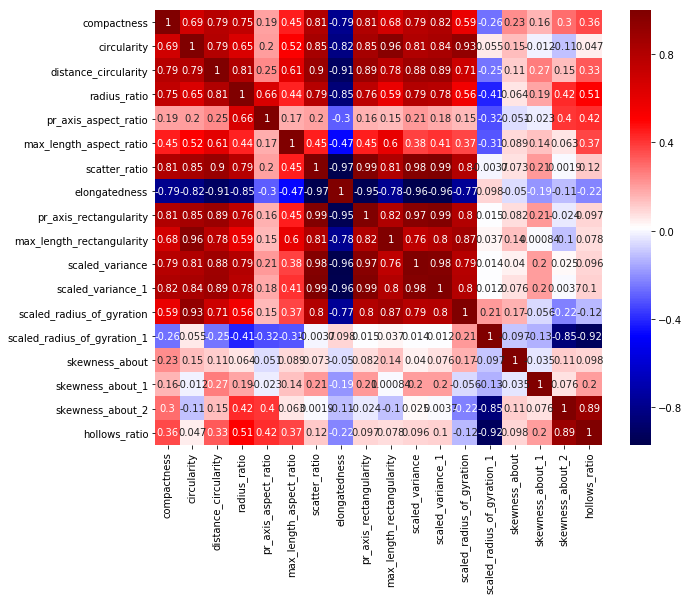

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(X_chk.corr(), cmap='seismic',annot=True,ax=ax)
plt.show()

In [22]:
# circularity,scatter_ratio, elongatedness, pr_axis_rectangularity, scaled_variance_1
# These variables have consistently strong corelation with lot of other variables
# We will drop this from the dataframe

In [23]:
X_chk.drop(columns=['circularity','scatter_ratio','pr_axis_rectangularity','elongatedness','scaled_variance_1'],inplace=True)

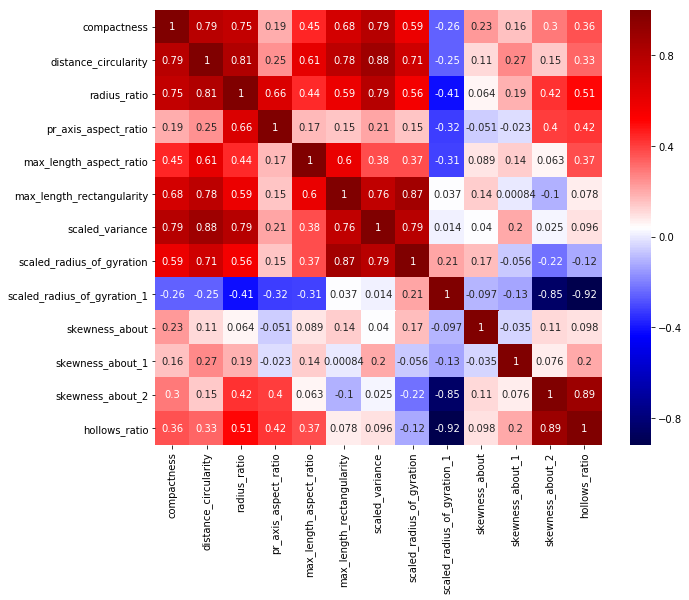

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(X_chk.corr(), cmap='seismic',annot=True,ax=ax)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [26]:
# In the coming sections we will evaluate the PCA method for dimension reduction

In [27]:
# We will create the PCA dimensions on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X_chk)          
cov_matrix = np.cov(X_std.T)
#print('Covariance Matrix \n%s', cov_matrix)

In [28]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-3.67373175e-01 -4.93713969e-02 -1.48534997e-01  1.52799970e-02
  -1.64694759e-01  3.08970478e-01 -5.37316772e-01  5.01190672e-01
   3.41959547e-01  1.84901703e-01 -1.43048084e-01 -4.97337701e-02
  -6.12665880e-02]
 [-3.95857391e-01 -1.04756091e-01 -1.50004028e-02  1.45630112e-01
   2.78775656e-02  6.41860922e-02 -4.51926837e-02 -4.85431856e-01
   7.90694778e-02 -3.75894699e-01 -5.38054932e-01  1.30508510e-01
  -3.37967570e-01]
 [-3.91209441e-01  6.94471065e-02  2.43328356e-01 -7.52118824e-02
  -1.97516065e-01 -8.01282941e-02 -1.55628040e-01 -2.11482778e-01
   2.17737439e-02  3.42644828e-02  3.30913492e-01  6.41514058e-01
   3.74428082e-01]
 [-1.88516704e-01  2.04130154e-01  5.08915550e-01 -3.50768123e-01
  -1.63481841e-01 -5.85100854e-01 -5.86589121e-02  1.51032430e-01
   1.01558872e-01 -5.17860373e-02 -1.23223086e-01 -2.88855824e-01
  -1.83903290e-01]
 [-2.71773907e-01 -1.23137802e-02 -1.67254805e-01  1.32586301e-01
   7.06645705e-01 -3.77201431e-01 -2.91540469e-0

In [29]:
eigen_df = pd.DataFrame(eig_vecs,index = X_chk.columns, columns = (['Comp_1','Comp_2','Comp_3','Comp_4','Comp_5','Comp_6','Comp_7','Comp_8','Comp_9','Comp_10','Comp_11','Comp_12','Comp_13']))

In [30]:
eigen_df

,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7,Comp_8,Comp_9,Comp_10,Comp_11,Comp_12,Comp_13
compactness,-0.367373,-0.049371,-0.148535,0.015280,-0.164695,0.308970,-0.537317,0.501191,0.341960,0.184902,-0.143048,-0.049734,-0.061267
distance_circularity,-0.395857,-0.104756,-0.015000,0.145630,0.027878,0.064186,-0.045193,-0.485432,0.079069,-0.375895,-0.538055,0.130509,-0.337968
radius_ratio,-0.391209,0.069447,0.243328,-0.075212,-0.197516,-0.080128,-0.155628,-0.211483,0.021774,0.034264,0.330913,0.641514,0.374428
pr_axis_aspect_ratio,-0.188517,0.204130,0.508916,-0.350768,-0.163482,-0.585101,-0.058659,0.151032,0.101559,-0.051786,-0.123223,-0.288856,-0.183903
max_length_aspect_ratio,-0.271774,-0.012314,-0.167255,0.132586,0.706646,-0.377201,-0.291540,0.021002,-0.282697,0.238143,0.092530,0.021628,-0.087799
max_length_rectangularity,-0.336323,-0.266642,-0.070769,-0.087999,0.221698,0.012741,0.389537,0.413137,0.113244,-0.573931,0.298188,0.007896,0.010177
scaled_variance,-0.361098,-0.218196,0.116075,0.084808,-0.217586,0.216163,-0.106630,-0.266476,-0.396151,0.011389,0.294940,-0.602251,0.134619
scaled_radius_of_gyration,-0.295980,-0.346119,-0.000223,-0.179488,-0.035142,0.016487,0.552761,0.010519,0.033420,0.635018,-0.197621,0.071603,-0.068355
scaled_radius_of_gyration_1,0.171378,-0.483781,0.124742,-0.015310,-0.177669,-0.124480,-0.174498,0.320647,-0.563469,-0.140373,-0.360341,0.227389,0.147350
skewness_about,-0.073916,0.006785,-0.767451,-0.277866,-0.378284,-0.400298,-0.031277,-0.111173,-0.050840,-0.067250,0.041318,-0.036455,0.038486


In [31]:
# We will evaluate each column and then for each component, we will evaluate the most significant factor

In [32]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,5.504949,3.057668,1.120736,1.110375,0.834115,0.638558,0.267585,0.196906,0.099042,0.078044,0.051913,0.021198,0.034462


# From eigen values, using Kaizer rule, we can create 4 components

In [33]:
# Reducing to 4 components from the 13
X_reduced = PCA(n_components=4).fit_transform(X_std)

In [34]:
X_reduced_df = pd.DataFrame(data = X_reduced, columns = ['Comp1','Comp2','Comp3','Comp4'])

In [35]:
X_reduced_df.head()

,Comp1,Comp2,Comp3,Comp4
0,-1.061144,-0.289039,-0.808372,-0.349316
1,0.765587,-0.421949,1.090803,0.450785
2,-3.036952,1.016314,0.682111,-1.016782
3,0.060780,-3.031743,0.344727,-0.152043
4,-1.995402,5.044758,0.168229,0.221430


In [36]:
y.head()

,class
0,van
1,van
2,car
3,van
5,bus


In [37]:
### So in the above setp we have X_reduced_df as the Dataframe with independent variables 
### and y remains as the dependent variable
### For any further modeling we will use the two dataframes which have been created using PCA method

### Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) 
### and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [38]:
### Calling libraries for gridsearch and SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [39]:
### Split the Dataset which has been reduced by PCA.
X_train, X_test, y_train, y_test = train_test_split(X_reduced_df, y, test_size=0.3, random_state=7)

In [40]:
### Defining the hyperparameters to be searched
params_to_search = [{'kernel': ['rbf'], 'C': [0.01, 0.05, 0.5, 1]},
                    {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}]

In [41]:
### In this line we are calling grid search to call the SVC model
### Parameters that need to be evaluated are parsed using the Params to search
### Cross Validation is done using KFOLD for 10 iterations
kfold = KFold(n_splits=10, random_state=7)
model = SVC()

In [42]:
### Call the SVC model in Grid Search
### Parse the parameters to the Model
### Run Cross Validation using KFOLD
grid = GridSearchCV(estimator=model, param_grid=params_to_search, cv=kfold)

In [43]:
grid_result = grid.fit(X_train, y_train)

In [44]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.779487 using {'C': 1, 'kernel': 'rbf'}
0.499145 (0.052568) with: {'C': 0.01, 'kernel': 'rbf'}
0.606838 (0.063808) with: {'C': 0.05, 'kernel': 'rbf'}
0.772650 (0.038737) with: {'C': 0.5, 'kernel': 'rbf'}
0.779487 (0.047718) with: {'C': 1, 'kernel': 'rbf'}
0.608547 (0.072556) with: {'C': 0.01, 'kernel': 'linear'}
0.646154 (0.050174) with: {'C': 0.05, 'kernel': 'linear'}
0.635897 (0.041422) with: {'C': 0.5, 'kernel': 'linear'}
0.634188 (0.043049) with: {'C': 1, 'kernel': 'linear'}


In [45]:
grid.score(X_test,y_test)

0.7817460317460317

In [46]:
### The excution of the model with the best fit parameter on the test dataset is 78%
### This is close to the fitment on Train parameters